Trained Weights:
Weight 0: 1.6999999999999933, Weight 1: -1.6000000000000008, Weight 2: -1.6000000000000005

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 0


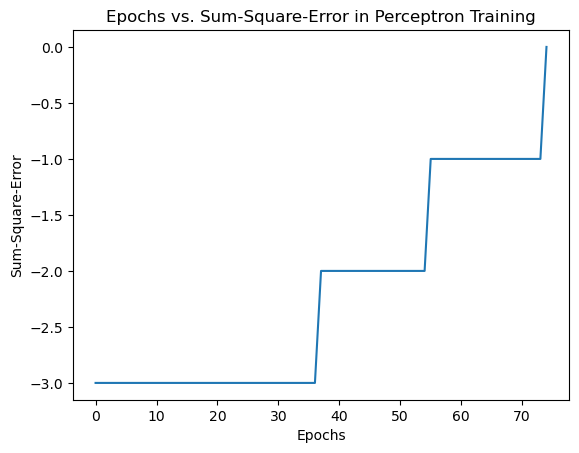

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights and learning rate
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_data = np.array([0, 0, 0, 1])

def activation_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_function):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = target_data[i]
            # Calculate the weighted sum
            weighted_sum = np.dot(weights, np.array([1, x1, x2]))
            # Calculate the error
            error = target - activation_function(weighted_sum)
            total_error += error
            # Update weights
            weights += learning_rate * error * np.array([1, x1, x2])
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron(initial_weights, learning_rate, 100, input_data, activation_function)

# Print the trained weights
print("Trained Weights:")
print(f"Weight 0: {trained_weights[0]}, Weight 1: {trained_weights[1]}, Weight 2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data, activation_function):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = target_data[i]
        weighted_sum = np.dot(weights, np.array([1, x1, x2]))
        prediction = activation_function(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, input_data, activation_function)

# Plot epochs against error values
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Epochs vs. Sum-Square-Error in Perceptron Training')
plt.show()



In [2]:
def bipolar_step_activation(weighted_sum):
    return -1 if weighted_sum < 0 else 1

def sigmoid_activation(weighted_sum):
    return 1 / (1 + np.exp(-weighted_sum))

def relu_activation(weighted_sum):
    return max(0, weighted_sum)

Input: (0, 0), Target: 0, Prediction: -1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 1


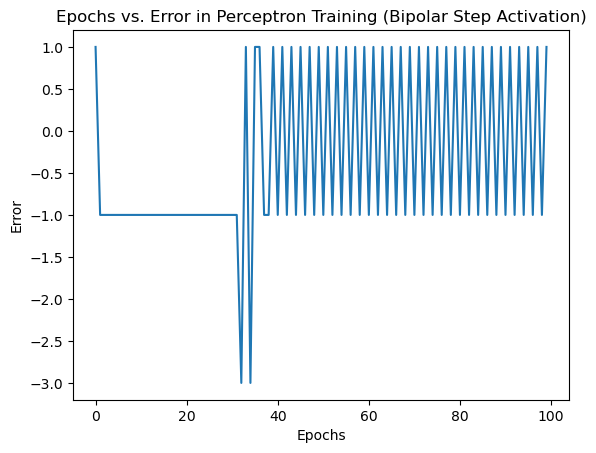

In [3]:
trained_weights_bipolar, error_values_bipolar = train_perceptron(initial_weights.copy(), learning_rate, 100, input_data, bipolar_step_activation)

test_perceptron(trained_weights_bipolar, input_data, bipolar_step_activation)

# Plot epochs against error values for bipolar step activation
plt.plot(range(len(error_values_bipolar)), error_values_bipolar)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error in Perceptron Training (Bipolar Step Activation)')
plt.show()


Input: (0, 0), Target: 0, Prediction: 0.2782081787132306
Input: (0, 1), Target: 0, Prediction: 0.3382226357706703
Input: (1, 0), Target: 0, Prediction: 0.341081919715102
Input: (1, 1), Target: 1, Prediction: 0.4070113276925225


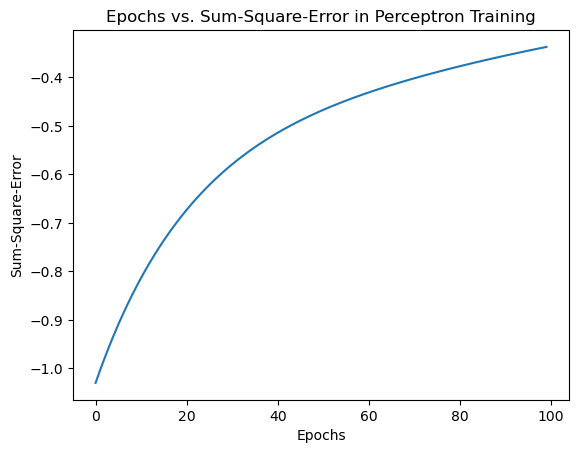

In [9]:
trained_weights, error_values = train_perceptron(initial_weights.copy(), learning_rate, 100, input_data,sigmoid_activation)

test_perceptron(trained_weights, input_data,sigmoid_activation)
# Plot epochs against error values
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Epochs vs. Sum-Square-Error in Perceptron Training')
plt.show()

Input: (0, 0), Target: 0, Prediction: 0
Input: (0, 1), Target: 0, Prediction: 0.24141588258083077
Input: (1, 0), Target: 0, Prediction: 0.255414107216444
Input: (1, 1), Target: 1, Prediction: 0.7075383954396837


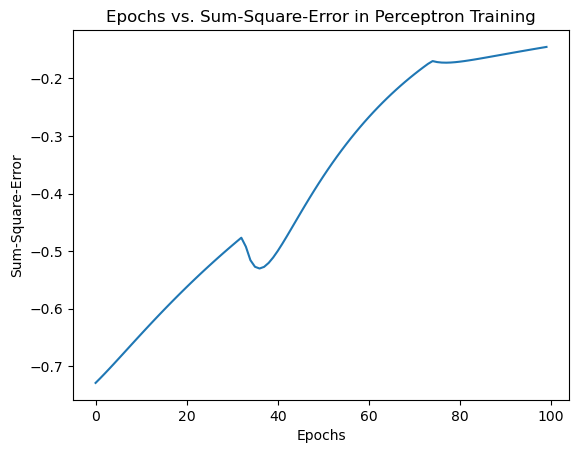

In [10]:
trained_weights, error_values = train_perceptron(initial_weights.copy(), learning_rate, 100, input_data,relu_activation)

test_perceptron(trained_weights, input_data,relu_activation)
# Plot epochs against error values
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Epochs vs. Sum-Square-Error in Perceptron Training')
plt.show()

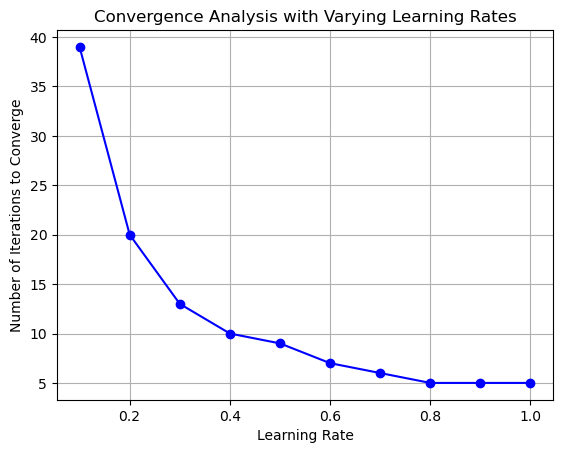

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize initial weights for the perceptron
weight_0 = 10
weight_1 = 0.2
weight_2 = -0.75

# Define training data for the AND gate problem
input_values = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_outputs = np.array([0, 0, 0, 1])

# Define the activation function
def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, input_data):
    error_history = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(input_data)):
            x1, x2 = input_data[i]
            target = target_outputs[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        error_history.append(total_error)
        if total_error == 0:
            break
    return error_history

# Convergence analysis function
def convergence_analysis(learning_rates):
    iteration_counts = []
    for lr in learning_rates:
        # Clone the initial weights to keep them the same for each learning rate
        weights = [weight_0, weight_1, weight_2]
        # Train the perceptron and collect errors
        error_values = train_perceptron(weights, lr, 100, input_values)
        iteration_counts.append(len(error_values))
    return iteration_counts

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iteration_counts = convergence_analysis(learning_rates)

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()


In [19]:
#A4
import numpy as np



def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = target_data[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([weight_0, weight_1, weight_2], learning_rate, 100, input_data)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = target_data[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")


# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, input_data)


Trained Weights:
W0: 1.6000000000000192, W1: -1.5000000000000002, W2: -1.4500000000000002

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 0


In [22]:
#A5
import numpy as np

# Define initial weights and learning rate
W0 = 0.1
W1 = 0.1
W2 = 0.1
W3 = 0.1
learning_rate = 0.1

# Training data
data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

# Target values (High Value or Low Value)
targets = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(x1, x2, x3, x4):
    weighted_sum = W0 + W1 * x1 + W2 * x2 + W3 * x3
    return sigmoid(weighted_sum)

def train_perceptron(max_epochs, data, targets):
    global W0, W1, W2, W3  # Declare global variables
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2, x3, x4 = data[i]
            target = targets[i]
            prediction = predict(x1, x2, x3, x4)
            error = target - prediction
            total_error += error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2
            W3 += learning_rate * error * x3
        if total_error == 0:
            break

# Train the perceptron
train_perceptron(1000, data, targets)

# Test the perceptron and print the results
for i in range(len(data)):
    x1, x2, x3, x4 = data[i]
    prediction = predict(x1, x2, x3, x4)
    classification = "Yes" if prediction >= 0.5 else "No"
    print(f"Customer C_{i + 1}: {classification}")


Customer C_1: Yes
Customer C_2: Yes
Customer C_3: Yes
Customer C_4: No
Customer C_5: Yes
Customer C_6: No
Customer C_7: Yes
Customer C_8: Yes
Customer C_9: No
Customer C_10: No


In [23]:
inverse = np.linalg.pinv(data)
inverse

array([[-0.01158602, -0.03328061,  0.00992701,  0.0309081 ,  0.01893411,
         0.01257157, -0.00872551,  0.00049436,  0.01868374, -0.00579619],
       [ 0.00809324, -0.03931864,  0.02004214,  0.01022259,  0.01645572,
        -0.01682076,  0.00109285,  0.00621381, -0.00780631, -0.0171085 ],
       [-0.02400235,  0.12210231, -0.06177958, -0.03305478, -0.05136901,
         0.05064536, -0.00279828, -0.01898852,  0.02274531,  0.05261889],
       [ 0.00150006,  0.00203556,  0.00021249, -0.0018353 , -0.00064341,
        -0.00095362,  0.00101203,  0.00046022, -0.00124752,  0.00037604]])

In [24]:
import numpy as np

class NeuralANDGate:
    def __init__(self, learning_rate=0.05):
        self.weights_input_hidden = np.random.randn(2, 2)
        self.weights_hidden_output = np.random.randn(1, 2)
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagate(self, inputs):
        hidden_layer = self.sigmoid(np.dot(self.weights_input_hidden, inputs))
        output_layer = self.sigmoid(np.dot(self.weights_hidden_output, hidden_layer))
        return output_layer

    def backpropagate(self, inputs, target_output, actual_output, hidden_layer):
        error = target_output - actual_output

        gradient_hidden_output = error * actual_output * (1 - actual_output)
        gradient_input_hidden = (gradient_hidden_output @ self.weights_hidden_output) * hidden_layer * (1 - hidden_layer)

        self.weights_hidden_output += self.learning_rate * np.outer(gradient_hidden_output, hidden_layer)
        self.weights_input_hidden += self.learning_rate * np.outer(gradient_input_hidden, inputs)

    def train(self, training_data):
        for inputs, target_output in training_data:
            hidden_layer = self.sigmoid(np.dot(self.weights_input_hidden, inputs))
            actual_output = self.forward_propagate(inputs)
            self.backpropagate(inputs, target_output, actual_output, hidden_layer)

    def predict(self, inputs):
        return self.forward_propagate(inputs)

# Create a new neural network for AND gate
network = NeuralANDGate()

# Train the network on the AND gate truth table
training_data = [(np.array([0, 0]), 0), (np.array([0, 1]), 0), (np.array([1, 0]), 0), (np.array([1, 1]), 1)]
network.train(training_data)

# Test the network for multiple inputs
inputs_list = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]

for inputs in inputs_list:
    output = network.predict(inputs)
    print(f"Input: {inputs}, Output: {output}")


Input: [0 0], Output: [0.62957906]
Input: [0 1], Output: [0.64794777]
Input: [1 0], Output: [0.5762484]
Input: [1 1], Output: [0.59025298]


In [25]:
import numpy as np

def initialize_neural_network(input_size, hidden_size, output_size, learning_rate=0.05):
    # Initialize weights with random values
    weights_input_hidden = np.random.randn(hidden_size, input_size)
    weights_hidden_output = np.random.randn(output_size, hidden_size)
    
    return {
        'weights_ih': weights_input_hidden,
        'weights_ho': weights_hidden_output,
        'learning_rate': learning_rate
    }

def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))

def forward_propagate(network, inputs):
    # Forward propagation
    hidden = sigmoid(np.dot(network['weights_ih'], inputs))
    output = sigmoid(np.dot(network['weights_ho'], hidden))
    return output, hidden

def backpropagate(network, inputs, target_output, actual_output, hidden):
    # Backpropagation
    error = target_output - actual_output

    gradient_ho = error * actual_output * (1 - actual_output)
    gradient_ih = (gradient_ho @ network['weights_ho']) * hidden * (1 - hidden)

    network['weights_ho'] += network['learning_rate'] * np.outer(gradient_ho, hidden)
    network['weights_ih'] += network['learning_rate'] * np.outer(gradient_ih, inputs)

def train_network(network, training_data):
    # Training the network
    for inputs, target_output in training_data:
        output, hidden = forward_propagate(network, inputs)
        backpropagate(network, inputs, target_output, output, hidden)

def predict(network, inputs):
    # Make predictions
    return forward_propagate(network, inputs)[0]

# Create a new XOR gate neural network
network = initialize_neural_network(input_size=2, hidden_size=2, output_size=1)

# Train the network on the XOR gate truth table
training_data = [(np.array([0, 0]), 0), (np.array([0, 1]), 1), (np.array([1, 0]), 1), (np.array([1, 1]), 0)]
train_network(network, training_data)

# Test the network for multiple inputs
inputs_list = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]

for inputs in inputs_list:
    output = predict(network, inputs)
    print(f"Input: {inputs}, Output: {output}")


Input: [0 0], Output: [0.80643612]
Input: [0 1], Output: [0.73693406]
Input: [1 0], Output: [0.79893235]
Input: [1 1], Output: [0.72766362]


In [26]:
import numpy as np

def initialize_perceptron(num_inputs, learning_rate=0.05):
    weights = np.random.randn(num_inputs)
    return weights, learning_rate

def sigmoid_activation(weighted_sum):
    return 1 / (1 + np.exp(-weighted_sum))

def backpropagate(weights, inputs, target_output, actual_output, learning_rate):
    error = target_output - actual_output
    delta = error * actual_output * (1 - actual_output)
    weights += learning_rate * delta * inputs

def train_perceptron(weights, training_examples, num_epochs=100):
    for epoch in range(num_epochs):
        for inputs, target_output in training_examples:
            weighted_sum = np.dot(inputs, weights)
            actual_output = sigmoid_activation(weighted_sum)
            backpropagate(weights, inputs, target_output, actual_output, learning_rate)

def predict_perceptron(weights, inputs):
    weighted_sum = np.dot(inputs, weights)
    return sigmoid_activation(weighted_sum)

# Create a new perceptron with 2 input features (for AND and XOR)
num_inputs = 2
perceptron_weights, learning_rate = initialize_perceptron(num_inputs)

# Create a training dataset for AND
training_and = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 0),
    (np.array([1, 0]), 0),
    (np.array([1, 1]), 1)
]

# Create a training dataset for XOR
training_xor = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 1),
    (np.array([1, 0]), 1),
    (np.array([1, 1]), 0)
]

# Train the perceptron for AND
train_perceptron(perceptron_weights, training_and)

# Test the perceptron for AND
inputs_and = np.array([1, 1])
output_and = predict_perceptron(perceptron_weights, inputs_and)
print("AND Gate:", output_and)

# Train the perceptron for XOR
train_perceptron(perceptron_weights, training_xor)

# Test the perceptron for XOR
inputs_xor = np.array([1, 1])
output_xor = predict_perceptron(perceptron_weights, inputs_xor)
print("XOR Gate:", output_xor)

# Additional test inputs
inputs_list = [
    np.array([0, 0]),
    np.array([0, 1]),
    np.array([1, 0]),
    np.array([1, 1])
]

for inputs in inputs_list:
    output = predict_perceptron(perceptron_weights, inputs)
    print(f"Input: {inputs}, Output: {output}")


AND Gate: 0.07537863106098279
XOR Gate: 0.21945711690566533
Input: [0 0], Output: 0.5
Input: [0 1], Output: 0.2940851426316749
Input: [1 0], Output: 0.40294539222823333
Input: [1 1], Output: 0.21945711690566533


In [27]:
from sklearn.neural_network import MLPClassifier
# Create an MLPClassifier with one hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=100)

# Train the classifier
mlp.fit(input_data, target_data)

# Print the trained weights and biases
print("Trained Weights (Coefs):")
print(mlp.coefs_)
print("Trained Biases (Intercepts):")
print(mlp.intercepts_)

# Test the trained classifier
def test_classifier(classifier, data, targets):
    predictions = classifier.predict(data)
    accuracy = (sum(predictions == targets) / len(targets)) * 100
    print("Predictions:", predictions)

# Test the trained classifier
print("\nTesting the Trained Classifier:")
test_classifier(mlp, input_data, target_data)

Trained Weights (Coefs):
[array([[ 0.512843  ,  0.41744062],
       [-0.62057033, -0.58091414]]), array([[-0.52393572],
       [-0.1611164 ]])]
Trained Biases (Intercepts):
[array([-0.45268706, -0.64647706]), array([-1.17049404])]

Testing the Trained Classifier:
Predictions: [0 0 0 0]
